# MODELOS PREDICTIVOS: BENTONITA

Notebook con el modelo predictivo de Random Forest para la variable 'bentonita' además de su predicción para valores recientes. 

In [116]:
# imports de RF
import pandas as pd
import warnings
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import plotly.graph_objects as go
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

from joblib import dump, load

# Modelo RANDOM FOREST

In [117]:
# Especifica la ruta del archivo Excel
archivo_excel_1 = r'C:/Users/a.sarrias/OneDrive - Tafalla Iron Foundry S.COOP/Documentos/datos/hastaMayo_M1.xlsx'
archivo_excel_2 = r'C:/Users/a.sarrias/OneDrive - Tafalla Iron Foundry S.COOP/Documentos/datos/hastaMayo_M2.xlsx'

# Carga los datos del archivo Excel en un DataFrame
df_1 = pd.read_excel(archivo_excel_1)
df_2 = pd.read_excel(archivo_excel_2)

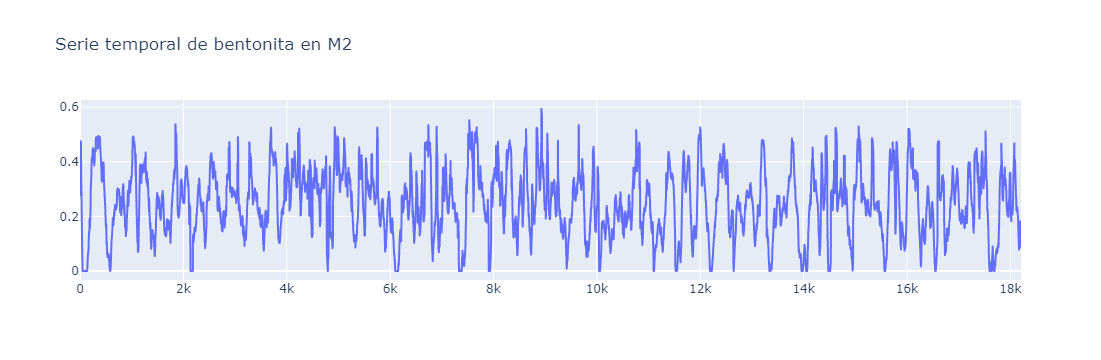

In [118]:
# df_1.set_index('fechaProduccion', inplace=True)
# df_2.set_index('fechaProduccion', inplace=True)

fig = go.Figure()
fig.add_trace(go.Scattergl(x=df_2.index,y=df_2.bentonita_norm,name='norm'))
# fig.add_trace(go.Scattergl(x=df_1.index,y=df_1.bentonita_norm_lag_1,name='lag1'))
# fig.add_trace(go.Scattergl(x=df_1.index,y=df_1.bentonita_norm_lag_2,name='lag2'))
fig.update_layout(title='Serie temporal de bentonita en M2')

fig.show()

In [119]:
# df_1.head()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 74 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   nMezclador                       18208 non-null  int64  
 1   codigoRef1                       18208 non-null  object 
 2   arena                            18208 non-null  float64
 3   bentonita                        18208 non-null  float64
 4   premez                           18208 non-null  float64
 5   finos                            18208 non-null  float64
 6   agua                             18208 non-null  float64
 7   humedadArenaAditivos             18208 non-null  float64
 8   humedadMezclaCalc                18208 non-null  float64
 9   tempArenaVieja                   18208 non-null  float64
 10  tempMezclaCalc                   18208 non-null  float64
 11  tempAgua                         18208 non-null  float64
 12  compactabilidad   

# Random Forest
Primero hacemos un modelo con todas las variables y luego ya iremos descartando las 'irrelevantes'

In [120]:
# variable objetivo para entrenamiento y test
col_y = 'bentonita_norm'

# características
cols_x = [
    'inicioSemana', 'premez_norm_lag_1', 
    'finos_norm_lag_1', 'tempArena_norm',
    'tempArena_norm_lag_1', 'humedadArenaAditivos_norm_lag_1', 
    'agua_norm_lag_1', 'tempArenaAditivos_norm_lag_1', 
    'tempAgua_norm_lag_1', 'tiempoVacio_norm_lag_1', 
    'compactabilidad_norm_lag_1', 'cizalla_norm_lag_1', 
    'tempMezclaCalc_norm_lag_1', 'humedadMezclaCalc_norm_lag_1', 
    'bentonita_norm_lag_1','bentonita_norm_lag_2', 'premez_norm_lag_2', 'finos_norm_lag_2', 
    'tempArena_norm_lag_2', 
    'humedadArenaAditivos_norm_lag_2', 'agua_norm_lag_2', 
    'tempArenaAditivos_norm_lag_2', 'tempAgua_norm_lag_2', 
    'tiempoVacio_norm_lag_2', 'compactabilidad_norm_lag_2', 
    'cizalla_norm_lag_2', 'tempMezclaCalc_norm_lag_2', 
    'humedadMezclaCalc_norm_lag_2'
]

X = df_1[cols_x]
y = df_1[col_y]

# Obtener el índice que representa el 80% de los datos
indice_80_percent = int(0.8 * len(df_1))

# Dividir el DataFrame en conjunto de entrenamiento y test
train_data = df_1.iloc[:indice_80_percent, :]
test_data = df_1.iloc[indice_80_percent:, :]

X_train = train_data[cols_x]
X_test = test_data[cols_x]
y_train = train_data[col_y]
y_test = test_data[col_y]

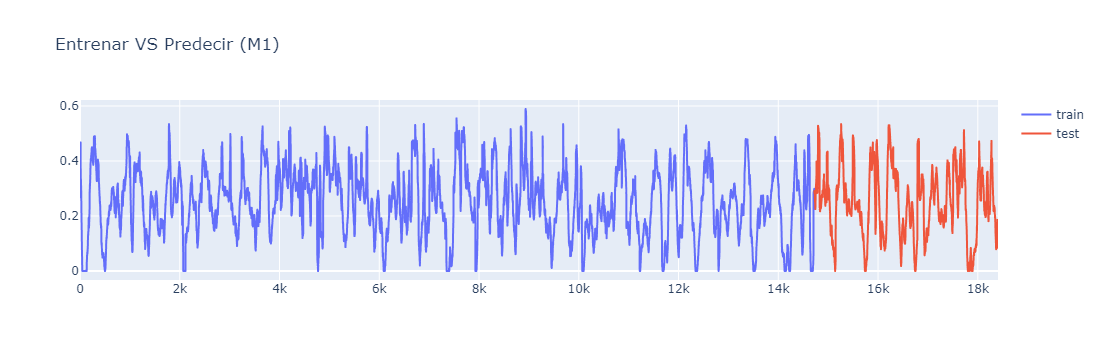

In [121]:
# aquí muestro con qué entrenamos al modelo y qué es lo que queremos predecir
fig = go.Figure()
fig.add_trace(go.Scattergl(x=X_train.index, y=y_train, mode='lines', name='train'))
fig.add_trace(go.Scattergl(x=X_test.index, y=y_test, mode='lines', name='test'))
fig.update_layout(title='Entrenar VS Predecir (M1)')

fig.show()

In [122]:
# # Definir el modelo RandomForestRegressor
# rf = RandomForestRegressor()

# # Definir los hiperparámetros a explorar en GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 150, 300],
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# # Crear un objeto GridSearchCV
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# # Ejecutar la búsqueda de hiperparámetros
# grid_search.fit(X_train, y_train)

# # Obtener los mejores hiperparámetros
# best_params = grid_search.best_params_
# print("Mejores hiperparámetros encontrados:")
# print(best_params)

Mejores hiperparámetros encontrados: 
{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}


In [123]:
# modelo random forest
rf_bent2 = RandomForestRegressor(
    n_estimators=50, random_state=42, 
    max_depth=5, min_samples_split=5, n_jobs=-1)

rf_bent2.fit(X_train, y_train)
y_pred = rf_bent2.predict(X_test)

# analizamos los residuos
res_test = y_test - y_pred 

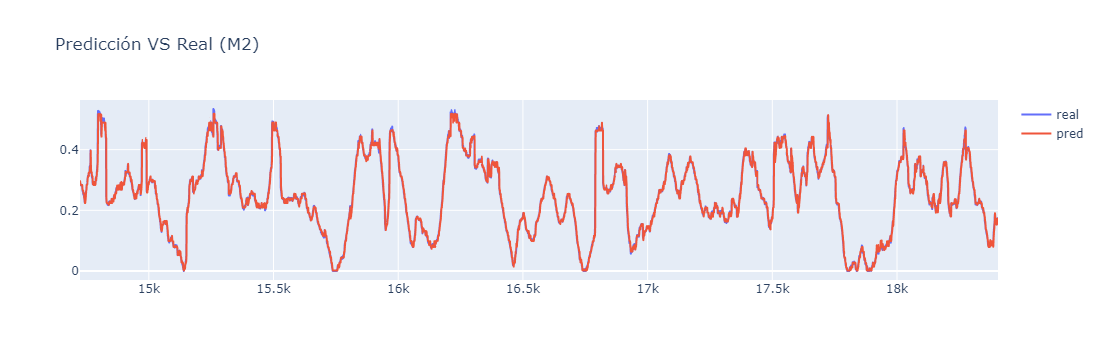

In [124]:
fig_pred1 = go.Figure()
fig_pred1.add_trace(go.Scattergl(x=X_test.index, y=y_test, mode='lines', name='real'))
fig_pred1.add_trace(go.Scattergl(x=X_test.index, y=y_pred, mode='lines', name='pred'))
fig_pred1.update_layout(title='Predicción VS Real (M2)')

fig_pred1.show()

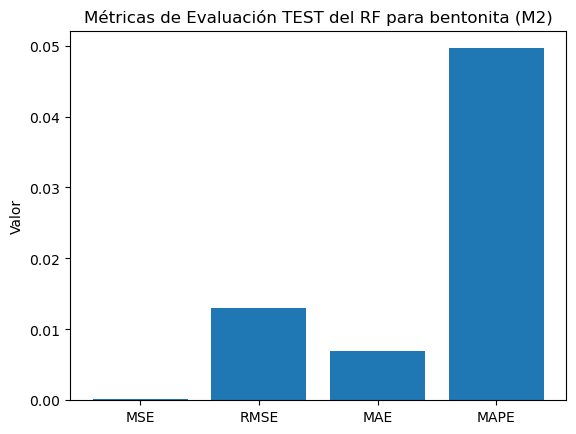

<Axes: >

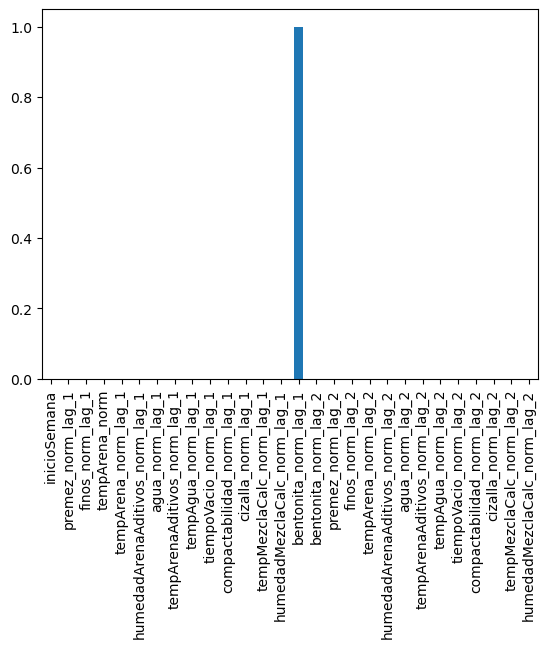

In [125]:
# Evaluación del modelo
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs(res_test / y_test)[~np.isinf(np.abs(res_test / y_test))])

metricas_test = {'MSE': mse_test, 'RMSE': rmse_test, 'MAE': mae_test, 'MAPE': mape_test}
plt.bar(metricas_test.keys(), metricas_test.values())
plt.title('Métricas de Evaluación TEST del RF para bentonita (M2)')
plt.ylabel('Valor')
plt.show()

# obtenemos la importancia de cada característica del modelo
importances = rf_bent2.feature_importances_

rf_imp = pd.Series(importances, index=cols_x)
rf_imp.plot.bar()

In [126]:
# cambiamos las características del modelo
# variable objetivo para entrenamiento y test

X1 = df_1.drop(columns=['codigoRef1', 'bentonita'])
# X1 = df_1.drop(columns=['fechaUltimaModificacion', 'codigoRef1', 'denominacionMezclador'])
# quito la bentonita pq es la variable a predecir, y quito las variables categóricas
y1 = df_1[col_y]

# Obtener el índice que representa el 80% de los datos
indice_80_percent = int(0.8 * len(df_1))

# Dividir el DataFrame en conjunto de entrenamiento y test
train_data1 = df_1.iloc[:indice_80_percent, :]
test_data1 = df_1.iloc[indice_80_percent:, :]

X_train1 = train_data1.drop(columns=['codigoRef1', 'bentonita'])
X_test1 = test_data1.drop(columns=['codigoRef1', 'bentonita'])
y_train1 = train_data1[col_y]
y_test1 = test_data1[col_y]

In [127]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18406 entries, 0 to 18405
Data columns (total 72 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   nMezclador                       18406 non-null  int64  
 1   arena                            18406 non-null  float64
 2   premez                           18406 non-null  float64
 3   finos                            18406 non-null  float64
 4   agua                             18406 non-null  float64
 5   humedadArenaAditivos             18406 non-null  float64
 6   humedadMezclaCalc                18406 non-null  float64
 7   tempArenaVieja                   18406 non-null  float64
 8   tempMezclaCalc                   18406 non-null  float64
 9   tempAgua                         18406 non-null  float64
 10  compactabilidad                  18406 non-null  float64
 11  cizalla                          18406 non-null  float64
 12  tiempoPreparacion 

In [128]:
# modelo random forest con 3 variables características
rf_bent2 = RandomForestRegressor(
    n_estimators=50, random_state=42, 
    max_depth=5, min_samples_split=5, n_jobs=-1)

rf_bent2.fit(X_train1, y_train1)
y_pred1 = rf_bent2.predict(X_test1)

# analizamos los residuos
res_test1 = y_test1 - y_pred1 

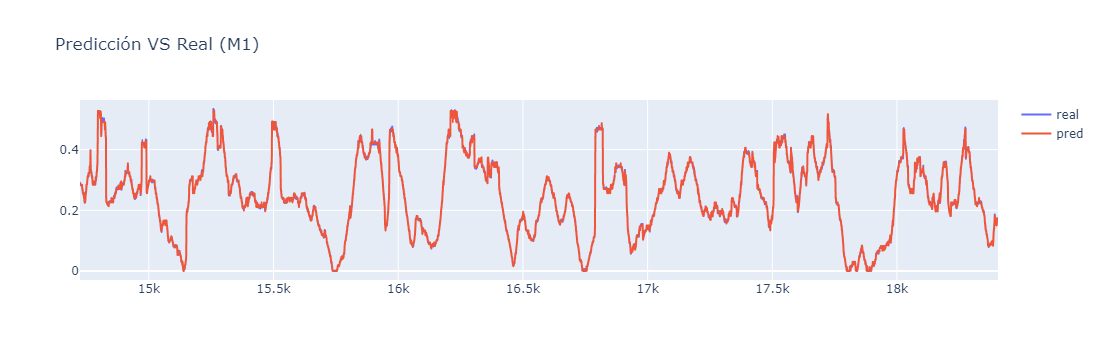

In [129]:
fig_pred1 = go.Figure()
fig_pred1.add_trace(go.Scattergl(x=X_test1.index, y=y_test1, mode='lines', name='real'))
fig_pred1.add_trace(go.Scattergl(x=X_test1.index, y=y_pred1, mode='lines', name='pred'))
fig_pred1.update_layout(title='Predicción VS Real (M1)')

fig_pred1.show()

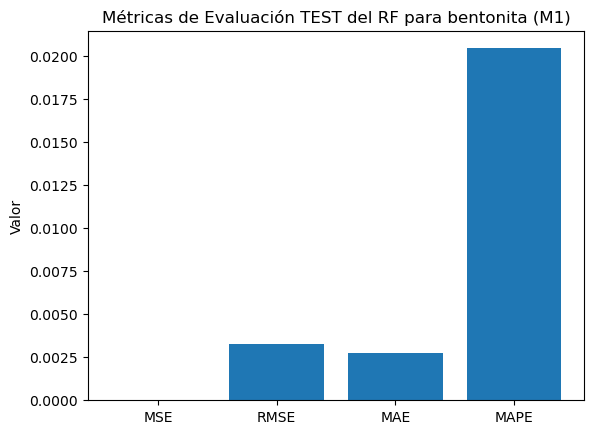

In [130]:
# Evaluación del modelo
mae_test = mean_absolute_error(y_test1, y_pred1)
mse_test = mean_squared_error(y_test1, y_pred1)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs(res_test1 / y_test1)[~np.isinf(np.abs(res_test1 / y_test1))])

metricas_test = {'MSE': mse_test, 'RMSE': rmse_test, 'MAE': mae_test, 'MAPE': mape_test}
plt.bar(metricas_test.keys(), metricas_test.values())
plt.title('Métricas de Evaluación TEST del RF para bentonita (M1)')
plt.ylabel('Valor')
plt.show()

<Axes: >

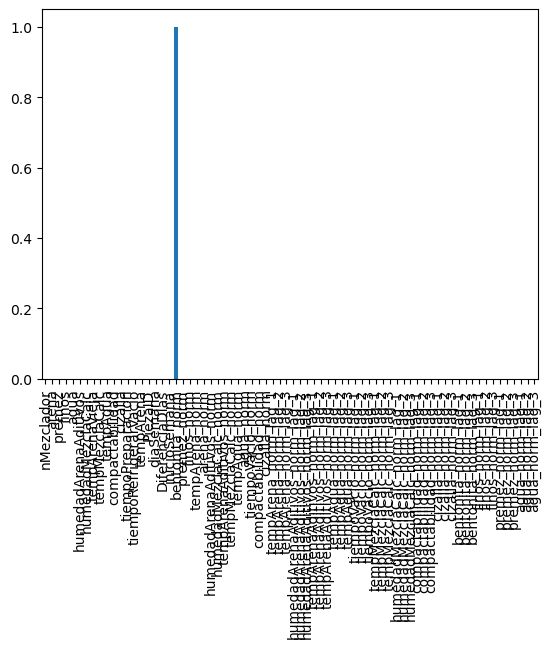

In [131]:
# Evaluación características
imp_caract = rf_bent2.feature_importances_

rf_imp = pd.Series(imp_caract, index=X1.columns)
rf_imp.plot.bar()

In [132]:
# con lag 1 de compac y cizalla
cols_guardar = ['diaSemana', 'inicioSemana', 'premez_norm', 'finos_norm', 'tempArena_norm',
               'humedadArenaAditivos_norm', 'tempArenaAditivos_norm', 'tempAgua_norm',
               'agua_norm', 'tiempoVacio_norm', 'compactabilidad_norm_lag_1', 'tiempoPreparacion',
               'cizalla_norm_lag_1', 'compactabilidad_norm_lag_2', 'cizalla_norm_lag_2']

X1 = df_1[cols_guardar]
y1 = df_1[col_y]

# Obtener el índice que representa el 80% de los datos
indice_80_percent = int(0.8 * len(df_1))

# Dividir el DataFrame en conjunto de entrenamiento y test
train_data_lag = df_1.iloc[:indice_80_percent, :]
test_data_lag = df_1.iloc[indice_80_percent:, :]

X_train_lag = train_data_lag[cols_guardar]
X_test_lag = test_data_lag[cols_guardar]
y_train_lag = train_data_lag[col_y]
y_test_lag = test_data_lag[col_y]

In [133]:
# con lag 1 de compac, cizalla y bentonita y quitando las otras 'irrelevantes'
cols_guardar = ['diaSemana', 'inicioSemana', 'finos_norm',
               'humedadArenaAditivos_norm', 'tempArenaAditivos_norm',
               'agua_norm', 'tiempoVacio_norm', 'bentonita_norm_lag_1', 'tiempoPreparacion',  
                'compactabilidad_norm_lag_2', 'cizalla_norm_lag_2']

X1 = df_1[cols_guardar]
y1 = df_1[col_y]

# Obtener el índice que representa el 80% de los datos
indice_80_percent = int(0.8 * len(df_1))

# Dividir el DataFrame en conjunto de entrenamiento y test
train_data_lag_2 = df_1.iloc[:indice_80_percent, :]
test_data_lag_2 = df_1.iloc[indice_80_percent:, :]

X_train_lag_2 = train_data_lag_2[cols_guardar]
X_test_lag_2 = test_data_lag_2[cols_guardar]
y_train_lag_2 = train_data_lag_2[col_y]
y_test_lag_2 = test_data_lag_2[col_y]

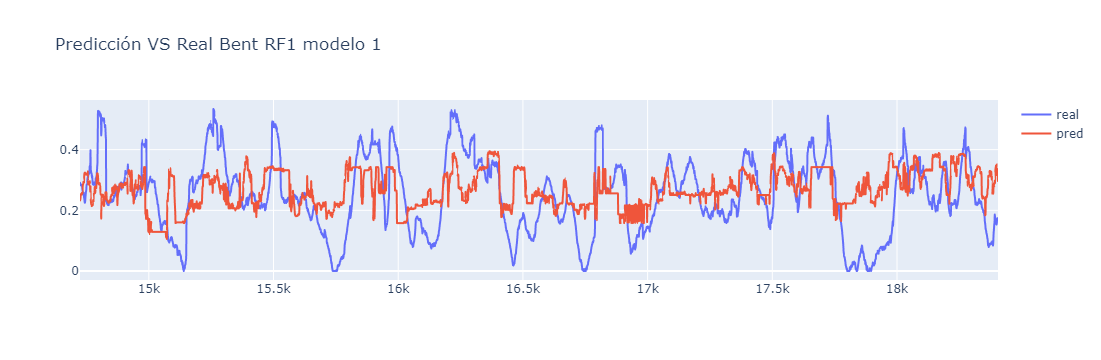

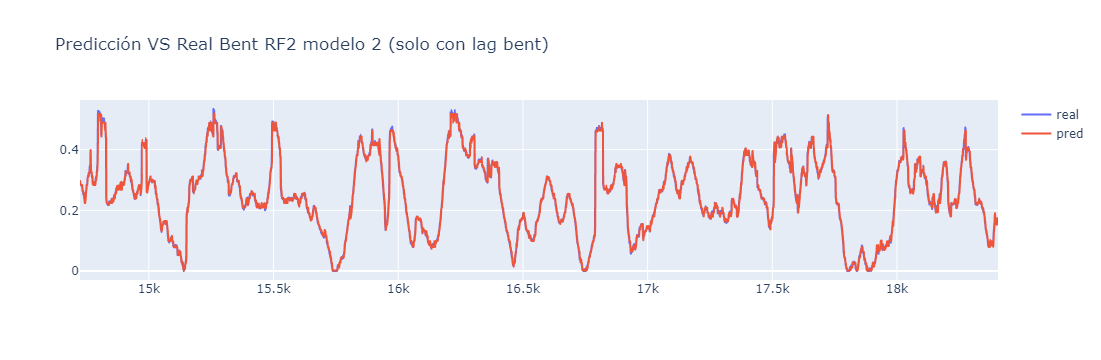

In [134]:
# con lag compac y cizalla
rf_bent_lag = RandomForestRegressor(
    n_estimators=50, random_state=42, 
    max_depth=5, min_samples_split=5, n_jobs=-1)

rf_bent_lag.fit(X_train_lag, y_train_lag)
y_pred_lag = rf_bent_lag.predict(X_test_lag)

# analizamos los residuos
res_test_lag = y_test_lag - y_pred_lag

fig_pred1 = go.Figure()
fig_pred1.add_trace(go.Scattergl(x=X_test_lag.index, y=y_test1, mode='lines', name='real'))
fig_pred1.add_trace(go.Scattergl(x=X_test_lag.index, y=y_pred_lag, mode='lines', name='pred'))
fig_pred1.update_layout(title='Predicción VS Real Bent RF1 modelo 1')

fig_pred1.show()


# con lag compac, cizalla y bentonita
rf_bent_lag_2 = RandomForestRegressor(
    n_estimators=50, random_state=42, 
    max_depth=5, min_samples_split=5, n_jobs=-1)

rf_bent_lag_2.fit(X_train_lag_2, y_train_lag_2)
y_pred_lag_2 = rf_bent_lag_2.predict(X_test_lag_2)

# analizamos los residuos
res_test_lag_2 = y_test_lag_2 - y_pred_lag_2

fig_pred1 = go.Figure()
fig_pred1.add_trace(go.Scattergl(x=X_test_lag_2.index, y=y_test1, mode='lines', name='real'))
fig_pred1.add_trace(go.Scattergl(x=X_test_lag_2.index, y=y_pred_lag_2, mode='lines', name='pred'))
fig_pred1.update_layout(title='Predicción VS Real Bent RF2 modelo 2 (solo con lag bent)')

fig_pred1.show()

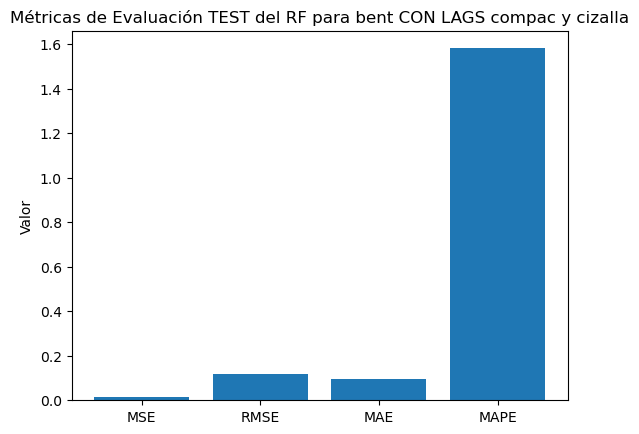

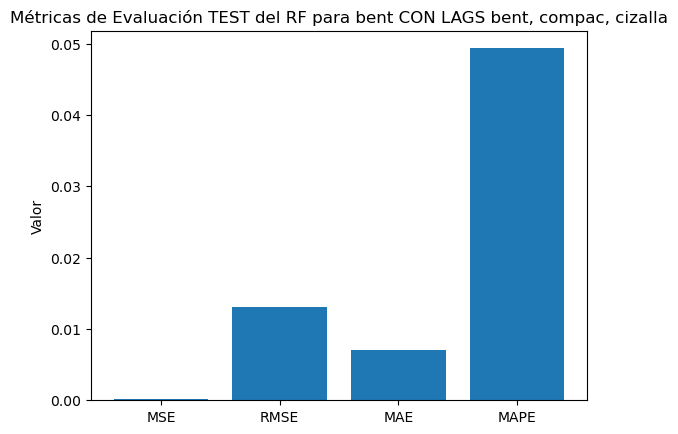

In [135]:
mae_test_lag = mean_absolute_error(y_test_lag, y_pred_lag)
mse_test_lag = mean_squared_error(y_test_lag, y_pred_lag)
rmse_test_lag = np.sqrt(mse_test_lag)
mape_test_lag = np.mean(np.abs(res_test_lag / y_test_lag)[~np.isinf(np.abs(res_test_lag / y_test_lag))])

metricas_test_lag = {'MSE': mse_test_lag, 'RMSE': rmse_test_lag, 'MAE': mae_test_lag, 'MAPE': mape_test_lag}
plt.bar(metricas_test_lag.keys(), metricas_test_lag.values())
plt.title('Métricas de Evaluación TEST del RF para bent CON LAGS compac y cizalla')
plt.ylabel('Valor')
plt.show()

mae_test_lag_2 = mean_absolute_error(y_test_lag_2, y_pred_lag_2)
mse_test_lag_2 = mean_squared_error(y_test_lag_2, y_pred_lag_2)
rmse_test_lag_2 = np.sqrt(mse_test_lag_2)
mape_test_lag_2 = np.mean(np.abs(res_test_lag_2 / y_test_lag_2)[~np.isinf(np.abs(res_test_lag_2 / y_test_lag_2))])

metricas_test_lag_2 = {'MSE': mse_test_lag_2, 'RMSE': rmse_test_lag_2, 'MAE': mae_test_lag_2, 'MAPE': mape_test_lag_2}
plt.bar(metricas_test_lag_2.keys(), metricas_test_lag_2.values())
plt.title('Métricas de Evaluación TEST del RF para bent CON LAGS bent, compac, cizalla')
plt.ylabel('Valor')
plt.show()

<Axes: >

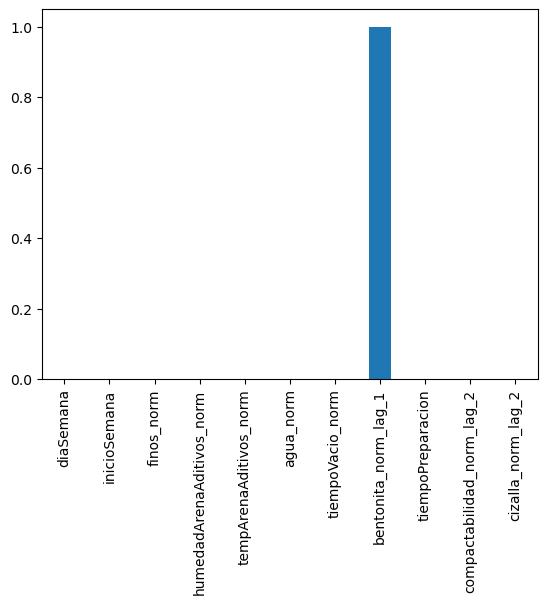

In [136]:
# Evaluación características
imp_caract_lag_2 = rf_bent_lag_2.feature_importances_

rf_imp_lag = pd.Series(imp_caract_lag_2, index=X1.columns)
rf_imp_lag.plot.bar()

In [137]:
dump(rf_bent_lag_2, r'C:\Users\a.sarrias\OneDrive - Tafalla Iron Foundry S.COOP\Documentos\modelos\M1_modelo_bent.joblib')

['C:\\Users\\a.sarrias\\OneDrive - Tafalla Iron Foundry S.COOP\\Documentos\\modelos\\M1_modelo_bent.joblib']

# PREDICCIÓN DATOS ACTUALES CON EL ÚLTIMO MODELO RF (modelo_bent_rf)

In [39]:
# Especifica la ruta del archivo Excel
archivo_excel_1 = r'C:\Users\a.sarrias\Documents\datos\datos_hasta8abril24_M1.xlsx'
# archivo_excel_2 = r'C:\Users\a.sarrias\Documents\datos\datos_hasta8abril24_M2.xlsx'


# Carga los datos del archivo Excel en un DataFrame
df_hasta8abril_M1 = pd.read_excel(archivo_excel_1)
# df_hasta8abril_M2 = pd.read_excel(archivo_excel_2)

rf_bent = load(r'C:\Users\a.sarrias\Documents\modelos\modelo_bent_rf.joblib')

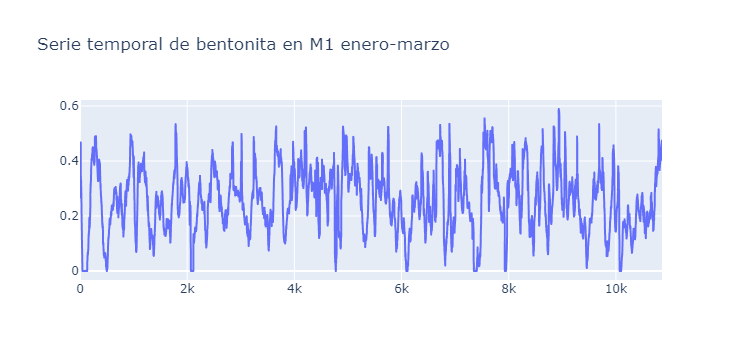

In [40]:
fig = go.Figure()
fig.add_trace(go.Scattergl(x=df_hasta8abril_M1.index,y=df_hasta8abril_M1.bentonita_norm,name='norm'))
fig.update_layout(title='Serie temporal de bentonita en M1 enero-marzo')

fig.show()

In [41]:
## actualidad con el nuevo modelo Random Forest

# Definir la variable objetivo y las características para entrenamiento y test
col_y = 'bentonita_norm'
cols_guardar = ['diaSemana', 'inicioSemana', 'finos_norm',
               'humedadArenaAditivos_norm', 'tempArenaAditivos_norm',
               'agua_norm', 'tiempoVacio_norm', 'bentonita_norm_lag_1', 'tiempoPreparacion']

# como el modelo ya está entrenado, solo hace falta predecir
X1 = df_hasta8abril_M1[cols_guardar] 
y1 = df_hasta8abril_M1[col_y]

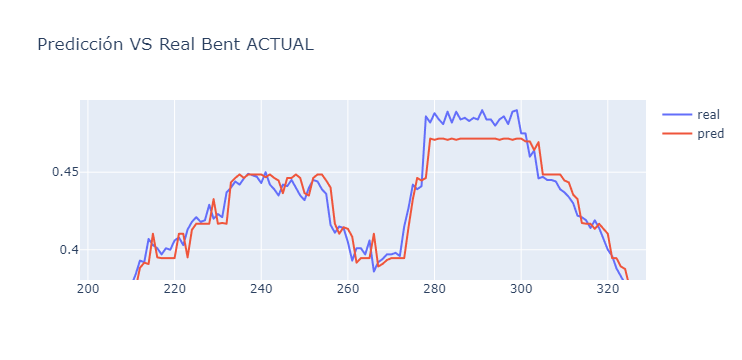

In [42]:
y_pred_actual = rf_bent.predict(X1)

# analizamos los residuos
res_actual = y1 - y_pred_actual

fig_pred1 = go.Figure()
fig_pred1.add_trace(go.Scattergl(x=X1.index, y=y1, mode='lines', name='real'))
fig_pred1.add_trace(go.Scattergl(x=X1.index, y=y_pred_actual, mode='lines', name='pred'))
fig_pred1.update_layout(title='Predicción VS Real Bent ACTUAL')

fig_pred1.show()

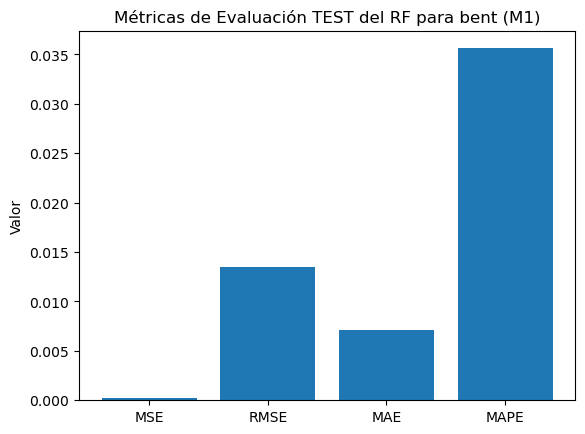

In [44]:
# Evaluación del modelo

mae_test_act = mean_absolute_error(y1, y_pred_actual)
mse_test_act = mean_squared_error(y1, y_pred_actual)
rmse_test_act = np.sqrt(mse_test_act)
mape_test_act = np.mean(np.abs(res_actual / y1)[~np.isinf(np.abs(res_actual / y1))])

metricas_test = {'MSE': mse_test_act, 'RMSE': rmse_test_act, 'MAE': mae_test_act, 'MAPE': mape_test_act}
plt.bar(metricas_test.keys(), metricas_test.values())
plt.title('Métricas de Evaluación TEST del RF para bent (M1)')
plt.ylabel('Valor')
plt.show()